<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 회귀분석 성능평가지표

In [ ]:
# 1. MAE(Mean Absolute Error)
# 정의 : 실제값과 예측값의 차이의 절댓값의 평균
# 에러의 크기가 그대로 반영됨
# 이상치에 영향을 받음
# 사이킷런 API 호출
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# 2. MSE(Mean Squared Error)
# 정의 : 실제값과 예측값의 차이의 제곱의 평균
# 실제값과 예측값 차이의 면적 합
# 특이값이 존재하면 수치가 증가함
# 사이킷런 API 호출
from sklearn.metrics import mean_squared_error
mse = mean_square_error(y_test, y_pred)

In [ ]:
# 3. RMSE(Root Mean Squared Error)
# 정의 : 실제값과 예측값의 차이의 평균에 루트를 씌움
# 에러에 제곱하면 에러가 클수록 가중치가 높게 반영됨
# 이를 방지하기 위해 루트(root)를 씌움
# 사이킷런 API 호출
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
# 루트 씌우기
rmse = np.sqrt(mse)

In [ ]:
# MSLE(Mean Squared Log Error)
# 정의 : 실제값과 예측값의 차이의 제곱의 평균에 로그를 취한 것
# 사이킷런 API 호출
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)

In [ ]:
# MAPE(Mean Absolute Percentage Error)
# 정의 : MAE를 퍼센트로 변환한 것
# 오차가 예측값에서 차지하는 정도를 나타냄
# 수식을 함수로 만들기
import numpy as np
def MAPE(y_test, y_pred) : 
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  return mape
mape = MAPE(y_test, y_pred)

### 분류분석 성능평가지표

In [ ]:
# 1. 정확도(Accuracy)
# 정의 : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
# 데이터 구성에 따라 머신러닝 모델의 성능을 왜곡할 가능성이 있음
# 사이킷런 API 호출
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [ ]:
# 2. 혼동행렬(Contusion Matrix)
# 정의 : 이진분류의 예측오류가 얼마이고, 어떠한 유형의 예측오류가 발생하고 있는지
#        나타내는 지표
# 정확도의 한계점을 보완하기 위해 사용됨.
# 사이킷런 API 호출
from sklearn.metrics import confusion_matrix
cm = cofusion_matrix(y_test, y_pred)

In [ ]:
# 3. 정밀도(Precision)
# 정의 : positive로 예측한 것들 중에서 실제로 positive인 것의 비율
# 사이킷런 API 호출
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

In [ ]:
# 4. 재현율(Recall) : 민감도라고도 불림
# 정의 : 실제 positive 중에서 positive로 예측한 것의 비율
# 사이킷런 API 호출
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

In [ ]:
# 5. F1스코어
# 정의 : 정밀도와 재현율을 결합한 분류 성능지표이다.
# 정밀도와 재현율이 적절한 조화를 이룰 때 상대적으로 높은 수치를 나타낸다. 
# 사이킷런 API 호출
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

In [ ]:
# 6. ROC곡선
# 정의 : FPR(False Positive Rate)이 변할 때 TRR(True Positive Rate)이 변하는 것을 
#        나타내는 곡선
# y축 : TPR, x축 : FPR
# 우상향 그래프로 그려짐
# 사이킷런 API 호출
from sklearn.metrics import roc_curve
# FPR, TPR 임계값 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# ROC곡선 그리기
import matplotlib.pyplot as plt
plt.plot(fpr, tpr) 

In [ ]:
# 7. AUC 스코어
# 정의 : ROC곡선 아래의 면적
# 1에 가까울수록 예측성능이 우수하다고 판단
# 랜덤 수준의 AUC 값은 0.5
# 사이킷런 API 호출
from sklearn.metrics import roc_curve, auc
# FPR, TPR 임계값 할당하기
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label = 1)
# AUC 값
auc = auc(fpr, tpr)

### 회귀분석 맛보기

### 1. 데이터 확인

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

# 보스턴 주택가격 로드하기
boston = load_boston()
# 독립변수(feature)만으로 된 numpy형태
boston_dt = boston.data
# 종속변수 값을 numpy형태로 가짐
price = boston.target

df = pd.DataFrame(boston_dt, columns = boston.feature_names)
df['PRICE'] = price

In [2]:
# 데이터 살펴보기
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# 데이터의 형태와 타입 확인하기
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# 결측치 여부 확인하기
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

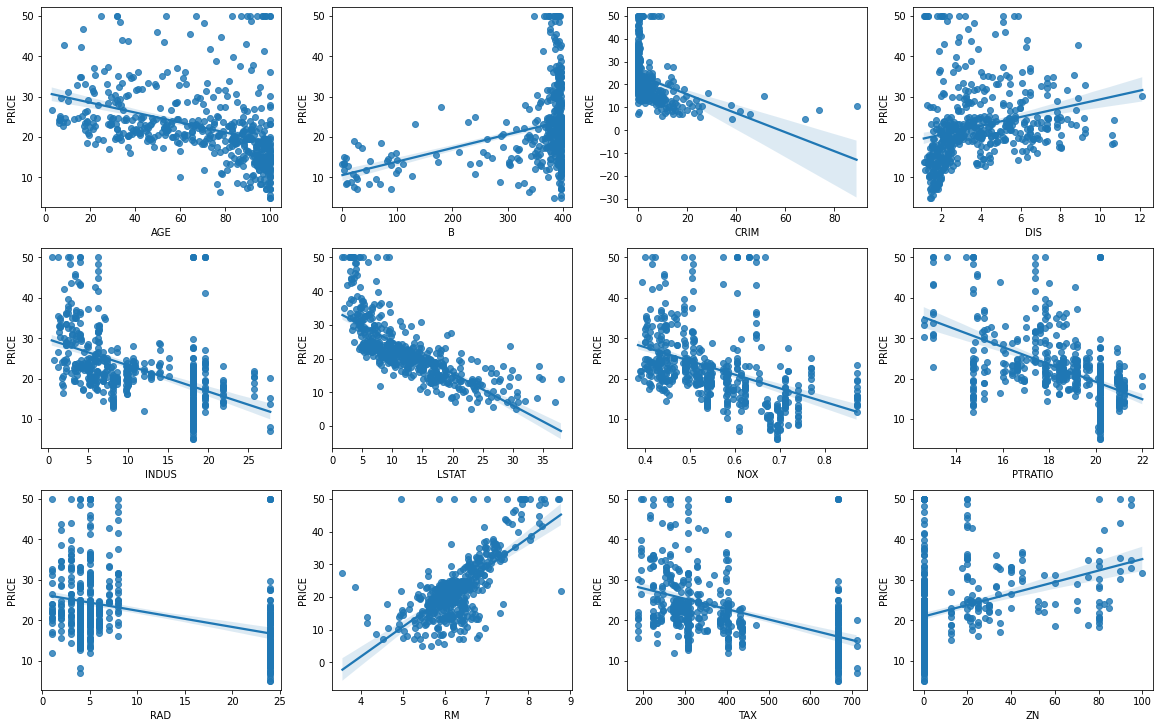

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot 그리기
fig, axs = plt.subplots(figsize=(16,10), ncols=4, nrows=3, 
                        constrained_layout=True)
# PRICE, CHAS변수 제외하기
features = df.columns.difference(['PRICE', 'CHAS'])

for i, feature in zip(range(12), features) : 
  # 행 번호 설정
  row = int(i/4)
  # 열 번호 설정
  col = i%4

  # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화
  sns.regplot(x=feature, y=df['PRICE'], data=df, ax=axs[row][col])

### 2. 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
        'PTRATIO', 'B', 'LSTAT']]
y = df['PRICE'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

In [8]:
# 분할된 데이터의 종속변수의 평균 확인하기
print('학습데이터세트 PRICE 평균: ', y_train.mean())
print('평가데이터세트 PRICE 평균: ', y_test.mean())

학습데이터세트 PRICE 평균:  22.796534653465343
평가데이터세트 PRICE 평균:  21.488235294117644


### 3. 전처리

In [9]:
# Min-max스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 4. 모델 학습(선형 회귀)

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# 학습 데이터의 예측값을 pre_train에 저장
pre_train = linear.predict(X_train_scaled)

# 평가 지표
mae = mean_absolute_error(y_train, pre_train)
mse = mean_squared_error(y_train, pre_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pre_train)

# 평가지표 출력
print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2: {r2:.5f}')

MAE: 3.32616
MSE: 22.11246
RMSE: 4.70239
R2: 0.74546


### 5. 성능평가 및 예측값 저장

In [20]:
# test데이터 정규화 시키기
X_test_scaled = scaler.transform(X_test)
pred = linear.predict(X_test_scaled)

In [21]:
# 성능평가 실시
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

# 성능평가 결과 출력
print(f'MAE: {mae:.5f}')
print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'R2: {r2:.5f}')

MAE: 3.23724
MSE: 24.63539
RMSE: 4.96341
R2: 0.66406


In [22]:
# 예측값 데이터 프레임으로저장하기
pred_df = pd.DataFrame(pred, columns = ['pred Price'])
pred_df.head()

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [23]:
# 실제값 데이터 프레임으로저장하기
actual = pd.DataFrame(y_test, columns = ['actual Price'])
actual.head()

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [24]:
# 병합 및 저장
reg_result = pd.concat([actual, pred_df], axis = 1)
reg_result.to_csv('reg_result.csv', index = False, encoding='utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927


### 분류분석 맛보기

### 1. 데이터 확인

In [28]:
from sklearn.datasets import load_iris
import pandas as pd

# iris로드하기
iris = load_iris()
# iris.data는 독립변수(feature)만으로 된 numpy 형태임
iris_dt = iris.data
# iris.target은 종속변수(label)값을 numpy형태로 가짐
iris_label = iris.target

df = pd.DataFrame(data=iris_dt, columns=iris.feature_names)
df['Species'] = iris_label

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
# Species컬럼 값 확인하기
df['Species'].unique()

array([0, 1, 2])

In [31]:
# 행과 열 확인하기
df.shape

(150, 5)

### 2. 데이터 분할

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dt, iris_label,
                                                    test_size=0.2, random_state=0,
                                                    stratify=iris_label)

### 3. 전처리

In [33]:
# 독립변수들이 모두 연속형이고 단위가 동일해서 스케일링 작업이 필요 없음
# 결측치 확인
df.isna().sum()  # 결측치 없음

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

### 4. 모델 학습(의사결정나무)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100)

In [35]:
# 교차검증(트리의 깊이 : 5)
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dtree_clf_5, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 검증 정확도:  0.9417


In [36]:
# 교차검증(트리의 깊이 : 3)
scores = cross_val_score(dtree_clf_3, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도:  0.925


In [37]:
# 교차검증(트리의 깊이 : 1)
scores = cross_val_score(dtree_clf_1, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


### 성능평가 및 예측값 저장

In [38]:
# X_train, y_train학습시키기
dtree_clf_5.fit(X_train, y_train)
# 예측값 pred 얻기
pred = dtree_clf_5.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'의사결정나무(교차검증 후) 예측 정확도: {accuracy_score(y_test, pred):.5f}')

의사결정나무(교차검증 후) 예측 정확도: 0.96667


In [39]:
# 예측값 저장
pred = pd.DataFrame(pred, columns = ['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,2
4,0


In [40]:
# 실제값 저장
actual = pd.DataFrame(y_test, columns = ['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,0
3,2
4,0


In [41]:
# 병합 및 저장
classify_result = pd.concat([actual, pred], axis=1)
classify_result.to_csv('clf_result.csv', index=False, encoding='utf-8-sig')
classify_result.head()

,actual Species,pred Species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0
